# Deadlines aus Simulation (FIFO)

In [1]:
# Datenzugriff
from configs.config import get_path

# Utils
import src.utils.presenter as show
from src.utils.analize import check_constrains as check

from src.utils.production_process import initialize as init

# Extern
import math
import numpy as np
import pandas as pd
pd.set_option('display.min_rows', 16)
pd.set_option('display.max_rows', 24)

In [2]:
# Simulation
from src.simulation.ProductionSimulation import ProductionSimulation

43.65


In [3]:
day_count = 4
basic_data_path = get_path("data", "basic")

df_instance = pd.read_csv(basic_data_path / "instance.csv")
df_jssp, df_jobs_arrivals = init.create_production_orders_for_shifts(df_template=df_instance, shift_count=day_count,
                                                                 shift_length=1440, shuffle=True, 
                                                                 job_seed=40, arrival_seed=80)
df_jobs_arrivals

,Job,Production_Plan_ID,Arrival
0,0,0,51
1,1,1,136
2,2,2,158
3,3,3,236
4,4,4,404
5,5,5,485
6,6,6,501
7,7,7,528
...,...,...,...
63,63,5,5239


In [4]:
shift_length=1440

df_jobs_arrivals['Ready Time'] = df_jobs_arrivals['Arrival'].apply(lambda arrival: math.ceil((arrival + 1) / shift_length) * shift_length)
df_jobs_arrivals

,Job,Production_Plan_ID,Arrival,Ready Time
0,0,0,51,1440
1,1,1,136,1440
2,2,2,158,1440
3,3,3,236,1440
4,4,4,404,1440
5,5,5,485,1440
6,6,6,501,1440
7,7,7,528,1440
...,...,...,...,...
63,63,5,5239,5760


In [5]:
df_jssp = df_jssp.merge(
    df_jobs_arrivals[['Job', 'Production_Plan_ID','Arrival', 'Ready Time']],
    on=['Job', 'Production_Plan_ID'],
    how='left'
)
df_jssp

,Job,Production_Plan_ID,Operation,Machine,Processing Time,Arrival,Ready Time
0,0,0,0,M00,29,51,1440
1,0,0,1,M01,78,51,1440
2,0,0,2,M02,9,51,1440
3,0,0,3,M03,36,51,1440
4,0,0,4,M04,49,51,1440
5,0,0,5,M05,11,51,1440
6,0,0,6,M06,62,51,1440
7,0,0,7,M07,56,51,1440
...,...,...,...,...,...,...,...
702,70,0,2,M02,9,5757,5760


## I) Simulation

In [6]:
simulation = ProductionSimulation(df_jssp, earliest_start_column = "Ready Time", sigma=0)
df_fcfs_execution = simulation.run(start_time = 0, end_time=None)

[Day 1 00:00:00] Job 0 started on M00
[Day 1 00:00:00] Job 2 started on M01
[Day 1 00:00:00] Job 4 started on M02
[Day 1 00:14:00] Job 4 finished on M02 (after 14 minutes)
[Day 1 00:14:00] Job 5 started on M02
[Day 1 00:29:00] Job 0 finished on M00 (after 29 minutes)
[Day 1 00:29:00] Job 1 started on M00
[Day 1 01:12:00] Job 1 finished on M00 (after 43 minutes)
[Day 1 01:12:00] Job 8 started on M00
[Day 1 01:31:00] Job 2 finished on M01 (after 91 minutes)
[Day 1 01:31:00] Job 3 started on M01
[Day 1 01:38:00] Job 5 finished on M02 (after 84 minutes)
[Day 1 01:38:00] Job 7 started on M02
[Day 1 02:09:00] Job 7 finished on M02 (after 31 minutes)
[Day 1 02:09:00] Job 14 started on M02
[Day 1 02:23:00] Job 14 finished on M02 (after 14 minutes)
[Day 1 02:23:00] Job 15 started on M02
[Day 1 02:28:00] Job 8 finished on M00 (after 76 minutes)
[Day 1 02:28:00] Job 10 started on M00
[Day 1 02:52:00] Job 3 finished on M01 (after 81 minutes)
[Day 1 02:52:00] Job 6 started on M01
[Day 1 02:54:00] J

In [7]:
df_fcfs_execution

,Job,Production_Plan_ID,Operation,Machine,Arrival,Ready Time,Start,Processing Time,End
0,0,0,0,M00,51,1440,1440.0,29.0,1469.0
1,0,0,1,M01,51,1440,2000.0,78.0,2078.0
2,0,0,2,M02,51,1440,2156.0,9.0,2165.0
3,0,0,3,M03,51,1440,2303.0,36.0,2339.0
4,0,0,4,M04,51,1440,2394.0,49.0,2443.0
5,0,0,5,M05,51,1440,2643.0,11.0,2654.0
6,0,0,6,M06,51,1440,2654.0,62.0,2716.0
7,0,0,7,M07,51,1440,2869.0,56.0,2925.0
...,...,...,...,...,...,...,...,...,...
702,70,0,2,M02,5757,5760,6547.0,9.0,6556.0


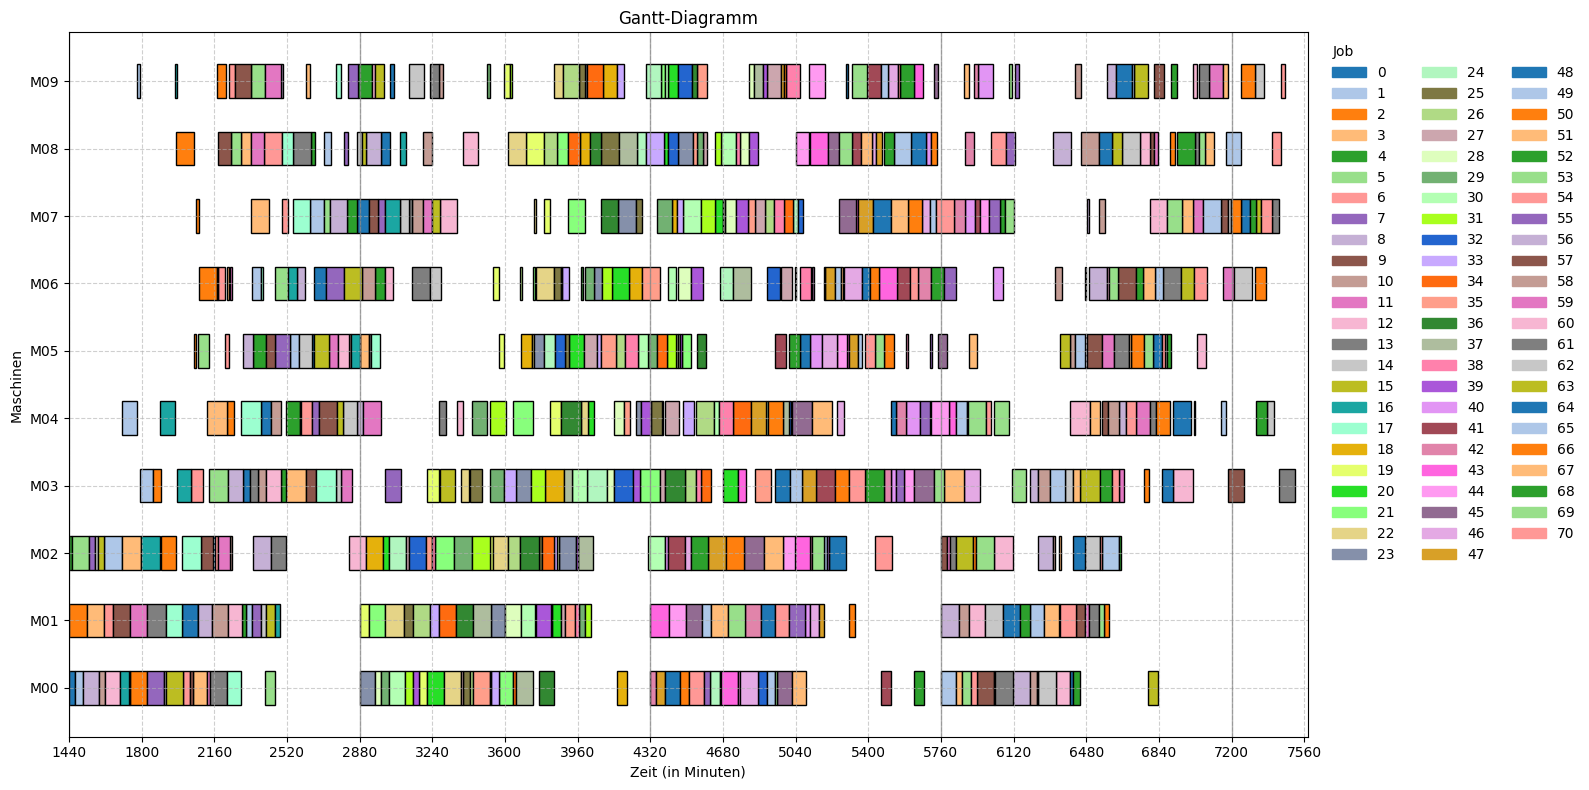

In [8]:
show.plot_gantt(df_fcfs_execution, perspective="Machine")

In [9]:
# Letzte Operation je Job auswählen
df_last_ops = df_fcfs_execution.sort_values("Operation").groupby("Job").last().reset_index()
df_last_ops

,Job,Production_Plan_ID,Operation,Machine,Arrival,Ready Time,Start,Processing Time,End
0,0,0,9,M09,51,1440,3029.0,21.0,3050.0
1,1,1,9,M08,136,1440,2706.0,30.0,2736.0
2,2,2,9,M04,158,1440,2225.0,33.0,2258.0
3,3,3,9,M05,236,1440,2883.0,43.0,2926.0
4,4,4,9,M06,404,1440,2954.0,53.0,3007.0
5,5,5,9,M07,485,1440,2706.0,25.0,2731.0
6,6,6,9,M04,501,1440,2591.0,55.0,2646.0
7,7,7,9,M03,528,1440,3006.0,79.0,3085.0
...,...,...,...,...,...,...,...,...,...
63,63,5,9,M07,5239,5760,7320.0,25.0,7345.0


In [10]:
df_jobs_times = df_last_ops[["Job", "Production_Plan_ID", "Arrival", "Ready Time", "End"]]

df_proc_time = df_jssp.groupby("Job", as_index=False)["Processing Time"].sum()
df_jobs_times = df_jobs_times.merge(df_proc_time, on="Job", how="left")
df_jobs_times

,Job,Production_Plan_ID,Arrival,Ready Time,End,Processing Time
0,0,0,51,1440,3050.0,395
1,1,1,136,1440,2736.0,510
2,2,2,158,1440,2258.0,568
3,3,3,236,1440,2926.0,655
4,4,4,404,1440,3007.0,393
5,5,5,485,1440,2731.0,496
6,6,6,501,1440,2646.0,416
7,7,7,528,1440,3085.0,539
...,...,...,...,...,...,...
63,63,5,5239,5760,7345.0,496


## 2) Log-Normalverteilung

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_deadline_distributions(df, n=3, seed=42, steps=1440, tick_interval=2880):
    """
    Plots histogram distributions of scattered deadlines for n evenly spaced jobs.
    Each subplot shows its own x–axis labels and title.
    
    Parameters:
    - df: DataFrame with columns 'Job', 'Deadline_List', 'Arrival', 'Ready Time', 'End'
    - n: number of jobs to plot (default 3)
    - seed: random seed for reproducibility
    - steps: step size for computing x_max (default 1440)
    - tick_interval: spacing between x–ticks (default 2880)
    """
    np.random.seed(seed)

    # sort & pick n evenly spaced jobs
    df_sorted = df.sort_values("Arrival").reset_index(drop=True)
    total = len(df_sorted)
    n = min(n, total)
    indices = np.linspace(0, total - 1, n, dtype=int)
    df_plot = df_sorted.iloc[indices].sort_values("Production_Plan_ID")

    # determine global x range & ticks
    x_max = max(max(lst) for lst in df_plot["Deadline_List"])
    x_ticks = np.arange(0, x_max + steps, tick_interval)

    # create subplots (no sharex) with ample size
    fig, axes = plt.subplots(n, 1, figsize=(14, n * 3.5))
    if n == 1:
        axes = [axes]

    for ax, (_, row) in zip(axes, df_plot.iterrows()):
        # histogram
        ax.hist(row["Deadline_List"], bins=50, density=True, alpha=0.7, color="orange")
        # vertical markers
        ax.axvline(row["Arrival"], color="blue", linestyle="--", linewidth=1, label="Arrival Time")
        ax.axvline(row["Ready Time"], color="green", linestyle="--", linewidth=2, label="Ready Time")
        ax.axvline(row["Ready Time"] + row["Processing Time"], color="orange", linestyle="--", linewidth=2, label="Earliest End")
        ax.axvline(row["End"], color="red", linestyle="--", linewidth=2, label="End")

        # titles & labels
        ax.set_title(f'Production_Plan {row["Production_Plan_ID"]} - Job {row["Job"]}')
        ax.set_ylabel("Dichte")
        ax.set_xlabel("Gestreute Deadline")
        ax.set_xticks(x_ticks)
        ax.tick_params(axis="x", labelrotation=90, labelsize=8, labelbottom=True)
        ax.set_xlim(0, x_max)

        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()


In [12]:
import pandas as pd

def add_deadline_list_from_fn(df: pd.DataFrame, base_fn, k: int = 5, seed: int = 42, **base_fn_kwargs) -> pd.DataFrame:
    """
    Erzeugt für jeden Job eine Liste von k Deadlines, indem die gegebene Funktion
    mehrfach mit unterschiedlichen Seeds aufgerufen wird.

    Parameter:
    - df (pd.DataFrame): DataFrame mit Spalte 'Deadline', wie von base_fn erzeugt
    - base_fn (callable): Funktion, die df und base_fn_kwargs entgegennimmt
                          und eine DataFrame mit Spalte 'Deadline' zurückgibt
    - k (int): Anzahl der Szenarien / Läufe pro Job
    - seed (int): Basis-Seed; die Läufe verwenden seed, seed+1, ..., seed+k-1
    - **base_fn_kwargs: weitere Parameter, die an base_fn übergeben werden

    Rückgabe:
    - pd.DataFrame: Kopie von df mit neuer Spalte 'Deadline_List' (List[int])
    """
    df_temp = df.copy()
    all_deadlines = []

    # k Läufe generieren
    for i in range(k):
        df_run = base_fn(df_temp, seed=seed + i, **base_fn_kwargs)
        all_deadlines.append(df_run["Deadline"].tolist())

    # Transponieren: pro Zeile eine Liste aus den k Werten
    n_rows = len(df_temp)
    deadline_list = [
        [all_deadlines[j][row_idx] for j in range(k)]
        for row_idx in range(n_rows)
    ]

    df_temp["Deadline_List"] = deadline_list
    return df_temp

### A) Lognormalverteilte Multiplikation von End-Zeiten zur Deadline-Erzeugung

In [13]:
def add_lognormal_deadlines_a(df: pd.DataFrame, sigma: float = 0.2, seed: int = 42) -> pd.DataFrame:
    """
    Fügt einem DataFrame eine Deadline-Spalte hinzu, basierend auf lognormalverteilten Faktoren multipliziert mit 'End'.

    Parameter:
        df (pd.DataFrame): DataFrame mit Spalte 'End'
        sigma (float): Standardabweichung der zugrunde liegenden Normalverteilung
        seed (int): Seed für Zufallszahlengenerierung

    Rückgabe:
        pd.DataFrame: Kopie des DataFrames mit zusätzlicher Spalte 'Deadline'
    """
    df_temp = df.copy()
    np.random.seed(seed)
    factors = np.random.lognormal(mean=0, sigma=sigma, size=len(df_temp))
    df_temp["Deadline"] = np.ceil(df_temp["End"] * factors).astype(int)
    return df_temp

df_with_deadlines_a = add_lognormal_deadlines_a(df_jobs_times, sigma=0.2)
df_with_deadlines_a    

,Job,Production_Plan_ID,Arrival,Ready Time,End,Processing Time,Deadline
0,0,0,51,1440,3050.0,395,3369
1,1,1,136,1440,2736.0,510,2662
2,2,2,158,1440,2258.0,568,2571
3,3,3,236,1440,2926.0,655,3968
4,4,4,404,1440,3007.0,393,2870
5,5,5,485,1440,2731.0,496,2607
6,6,6,501,1440,2646.0,416,3629
7,7,7,528,1440,3085.0,539,3597
...,...,...,...,...,...,...,...
63,63,5,5239,5760,7345.0,496,5783


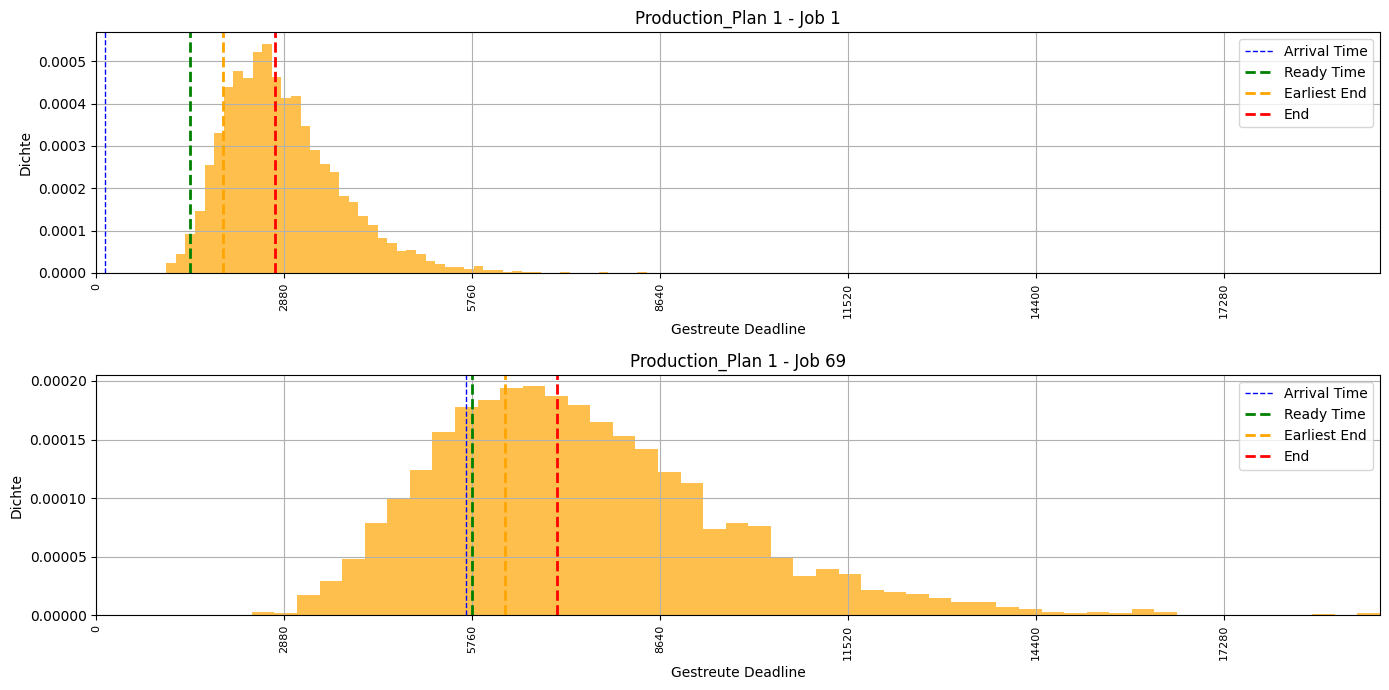

,Job,Production_Plan_ID,Arrival,Ready Time,End,Processing Time,Deadline_List
1,1,1,136,1440,2736.0,510,"[2625, 2084, 4061, 2959, 3959, 4049, 1989, 213..."
16,16,1,1310,1440,3108.0,510,"[2294, 5555, 4273, 2297, 3181, 3857, 5734, 427..."
29,29,1,2338,2880,4580.0,510,"[4197, 5888, 4854, 2789, 5038, 5044, 3877, 621..."
31,31,1,2520,2880,4672.0,510,"[8144, 5954, 5579, 4268, 4578, 3379, 3730, 759..."
47,47,1,3544,4320,5466.0,510,"[7506, 7215, 7097, 5040, 4944, 6998, 7370, 343..."
50,50,1,3804,4320,5739.0,510,"[6326, 5264, 7885, 5326, 7142, 6231, 4310, 850..."
69,69,1,5667,5760,7069.0,510,"[5826, 4788, 8922, 7768, 6067, 7011, 8337, 710..."


In [14]:
df_a = add_deadline_list_from_fn(df_jobs_times, base_fn=add_lognormal_deadlines_a,
                                          k=5000, seed=42, sigma=0.3)

filt = df_a.Production_Plan_ID.astype(str) == "1"
df_plot = df_a[filt]
plot_random_deadline_distributions(df_plot, n=2)
df_plot

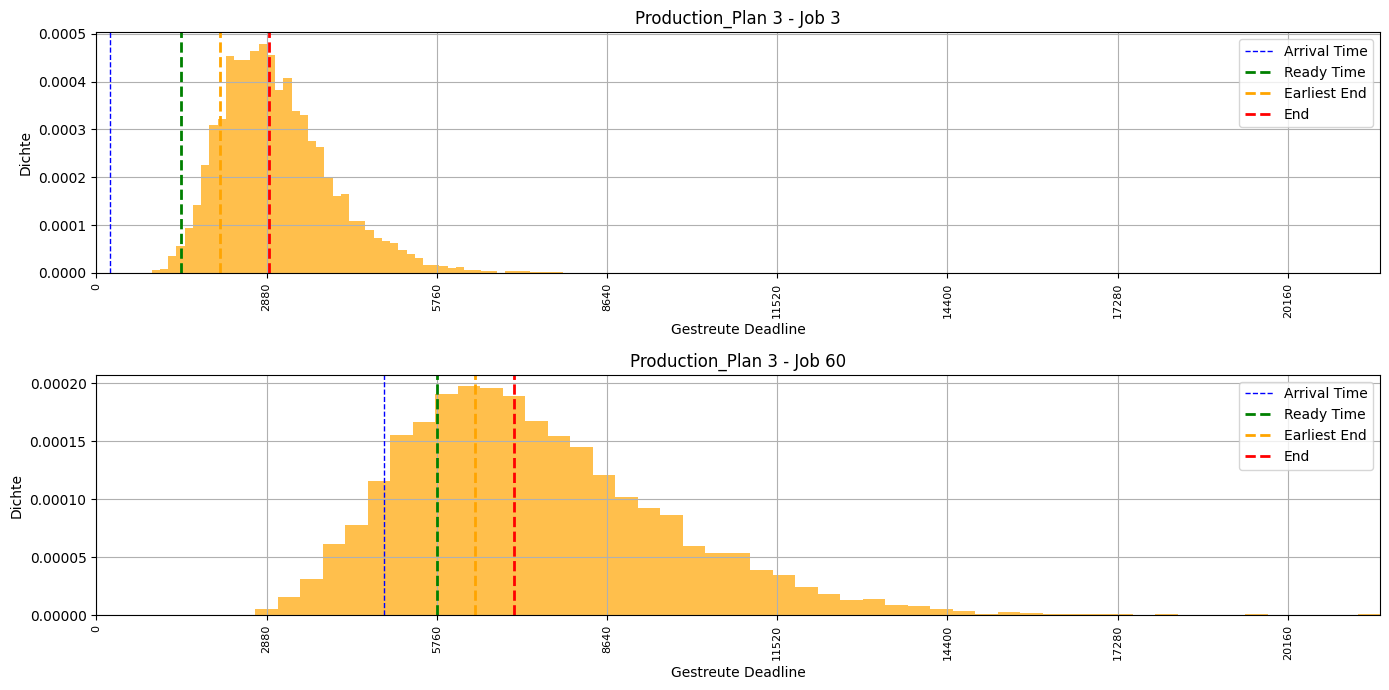

In [15]:
filt = df_a.Production_Plan_ID.astype(str) == "3"
df_plot = df_a[filt]
plot_random_deadline_distributions(df_plot, n=2)

### B) Lognormalverteilte Deadlines aus globalem mittleren End-Wert, verschoben auf individuelle End-Werte

In [16]:
def add_lognormal_deadlines_b(df: pd.DataFrame, sigma: float = 0.2, seed: int = 42) -> pd.DataFrame:
    """
    Fügt dem DataFrame eine 'Deadline'-Spalte hinzu, indem lognormalverteilte Zufallswerte
    mit Erwartungswert ≈ mean(End) erzeugt und differenziell zu jedem End-Wert addiert werden.

    Die Formel lautet:
        Deadline_i = End_i + (Z_i - mean_end), wobei Z_i ~ LogNormal(mu, sigma)

    Dadurch bleibt die Gesamtverteilung um End erhalten, aber mit asymmetrischer Streuung.
    """
    df_copy = df.copy()
    np.random.seed(seed)

    mean_end = df_copy["End"].mean()
    mu = np.log(mean_end) - 0.5 * sigma**2

    # Lognormalverteilte Zufallswerte mit Erwartung ≈ mean_end
    samples = np.random.lognormal(mean=mu, sigma=sigma, size=len(df_copy))

    # Deadline = End + (Sample - mean_end)
    df_copy["Deadline"] = (df_copy["End"] + (samples - mean_end)).round(1)

    return df_copy

df_with_deadlines_b = add_lognormal_deadlines_b(df_jobs_times, sigma=0.2)
df_with_deadlines_b

,Job,Production_Plan_ID,Arrival,Ready Time,End,Processing Time,Deadline
0,0,0,51,1440,3050.0,395,3469.6
1,1,1,136,1440,2736.0,510,2499.5
2,2,2,158,1440,2258.0,568,2846.3
3,3,3,236,1440,2926.0,655,4599.1
4,4,4,404,1440,3007.0,393,2678.5
5,5,5,485,1440,2731.0,496,2402.5
6,6,6,501,1440,2646.0,416,4395.4
7,7,7,528,1440,3085.0,539,3810.7
...,...,...,...,...,...,...,...
63,63,5,5239,5760,7345.0,496,6184.6


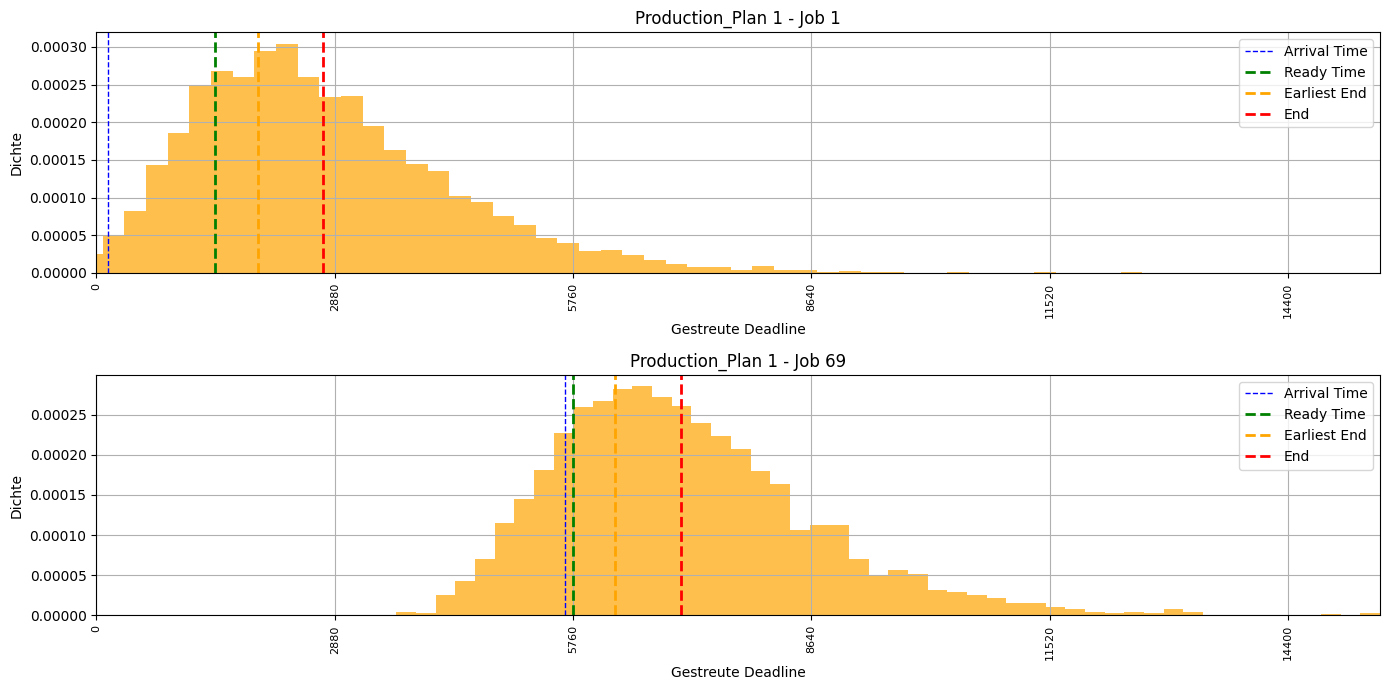

In [17]:
df = add_deadline_list_from_fn(df_jobs_times, base_fn=add_lognormal_deadlines_b,
                                          k=5000, seed=42, sigma=0.3)

filt = df.Production_Plan_ID.astype(str) == "1"
df_plot = df[filt]
plot_random_deadline_distributions(df_plot, n=2)

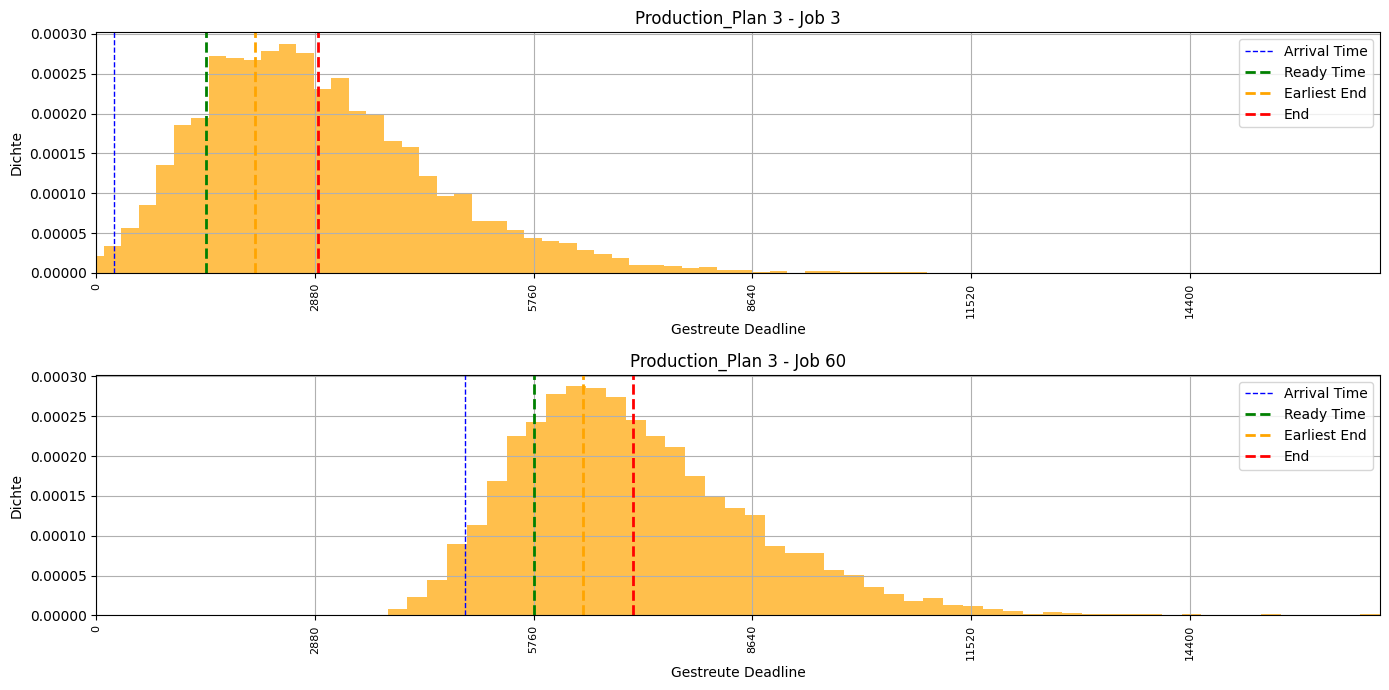

In [18]:
filt = df.Production_Plan_ID.astype(str) == "3"
df_plot = df[filt]
plot_random_deadline_distributions(df_plot, n=2)

### C) Lognormalverteilte Deadlines je Produktionsplan, direkt aus Gruppenmittelwert erzeugt

In [19]:
def add_groupwise_lognormal_deadlines_c(df: pd.DataFrame, sigma: float = 0.2, seed: int = 42) -> pd.DataFrame:
    """
    Fügt Deadlines hinzu, die direkt aus einer lognormalen Verteilung mit Erwartungswert = mean(End) pro Gruppe gezogen werden.
    """
    np.random.seed(seed)
    df_temp = df.copy()
    df_temp["Deadline"] = np.nan  # Leere Spalte vorbereiten

    for plan_id, group in df_temp.groupby("Production_Plan_ID"):
        n = len(group)
        mean_end = group["End"].mean()

        # Berechne μ so, dass E[X] = mean_end
        mu = np.log(mean_end) - 0.5 * sigma**2

        # Ziehe Deadlines direkt aus lognormaler Verteilung
        deadlines = np.random.lognormal(mean=mu, sigma=sigma, size=n)

        # Runde und eintragen
        df_temp.loc[group.index, "Deadline"] = np.round(deadlines, 1)

    return df_temp


df_with_deadlines_c = add_groupwise_lognormal_deadlines_c(df_jobs_times, sigma=0.2)
df_with_deadlines_c

,Job,Production_Plan_ID,Arrival,Ready Time,End,Processing Time,Deadline
0,0,0,51,1440,3050.0,395,5793.5
1,1,1,136,1440,2736.0,510,4254.0
2,2,2,158,1440,2258.0,568,4317.4
3,3,3,236,1440,2926.0,655,4800.6
4,4,4,404,1440,3007.0,393,4897.9
5,5,5,485,1440,2731.0,496,5356.2
6,6,6,501,1440,2646.0,416,4660.2
7,7,7,528,1440,3085.0,539,5505.1
...,...,...,...,...,...,...,...
63,63,5,5239,5760,7345.0,496,5019.6


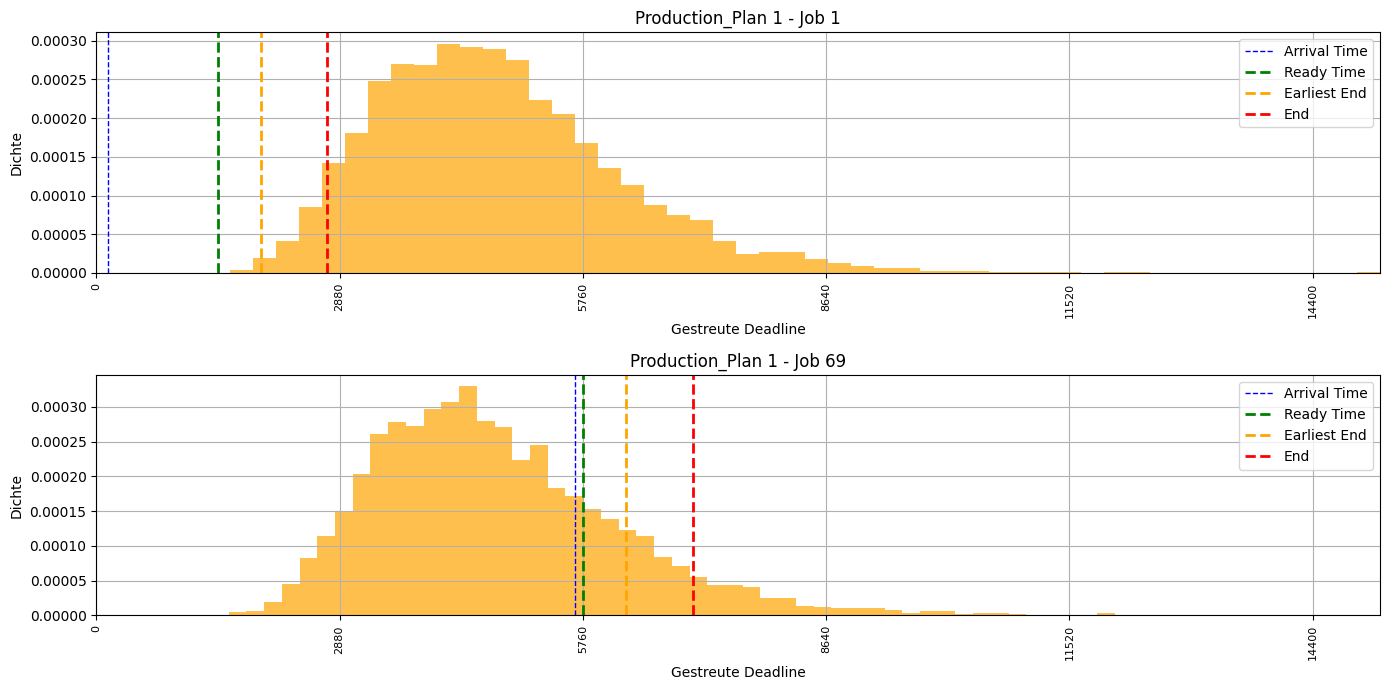

In [20]:
df = add_deadline_list_from_fn(df_jobs_times, base_fn=add_groupwise_lognormal_deadlines_c,
                                          k=5000, seed=42, sigma=0.3)

filt = df.Production_Plan_ID.astype(str) == "1"
df_plot = df[filt]
plot_random_deadline_distributions(df_plot, n=2)

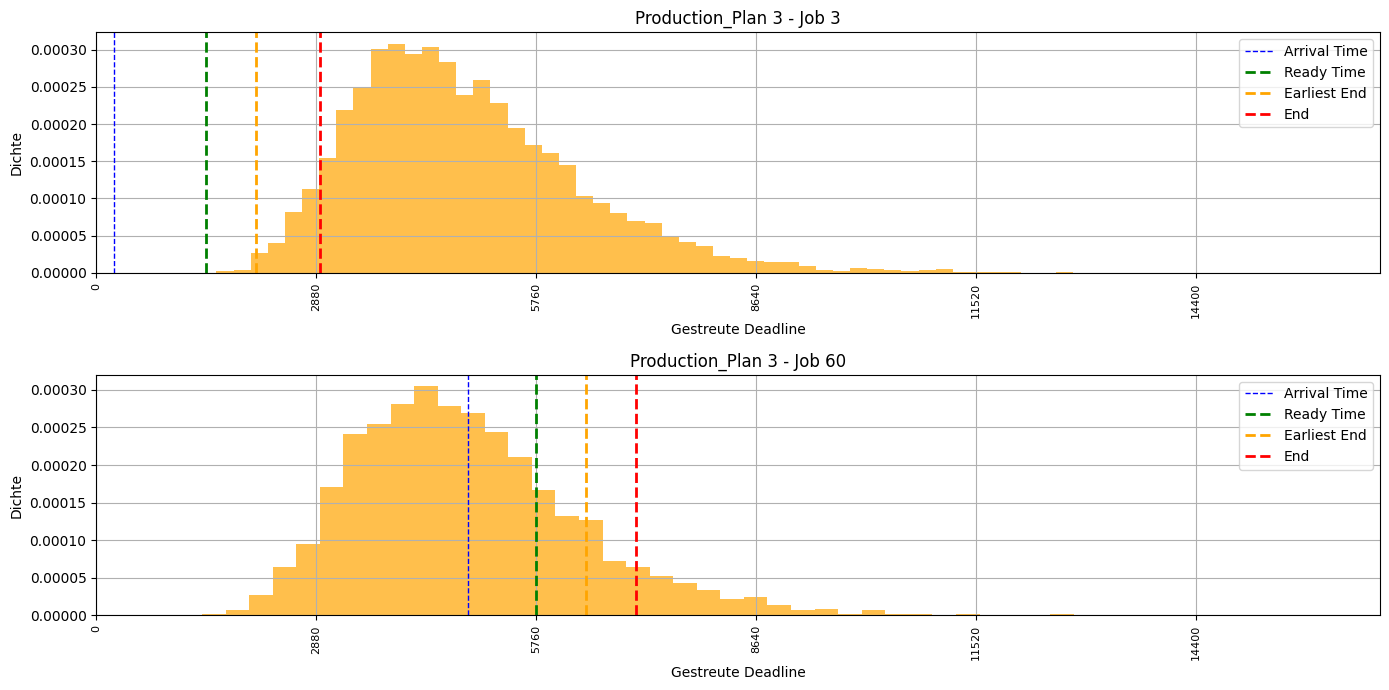

In [21]:
filt = df.Production_Plan_ID.astype(str) == "3"
df_plot = df[filt]
plot_random_deadline_distributions(df_plot, n=2)

### D) Lognormalverteilte Deadlines je Produktionsplan, verschoben auf individuelle End-Werte

In [22]:
def add_groupwise_lognormal_deadlines(df: pd.DataFrame, sigma: float = 0.2, seed: int = 42) -> pd.DataFrame:
    """
    Fügt Deadlines hinzu, berechnet als:
        Deadline = End + (lognormal_sample - mean_end)
    
    Für jede Gruppe ('Production_Plan_ID') wird ein eigener mean_end berechnet,
    und lognormalverteilte Werte mit E[X] = mean_end erzeugt.
    """
    np.random.seed(seed)
    df_temp = df.copy()
    df_temp["Deadline"] = np.nan

    for plan_id, group in df_temp.groupby("Production_Plan_ID"):
        n = len(group)
        mean_end = group["End"].mean()
        mu = np.log(mean_end) - 0.5 * sigma**2

        # Lognormalverteilte Zufallswerte mit E[X] = mean_end
        samples = np.random.lognormal(mean=mu, sigma=sigma, size=n)

        # Verschiebung auf individuelles End
        shifted_deadlines = group["End"].values + (samples - mean_end)

        # Eintragen der gerundeten Deadlines
        df_temp.loc[group.index, "Deadline"] = np.round(shifted_deadlines, 1)

    return df_temp

df_with_deadlines = add_groupwise_lognormal_deadlines(df_jobs_times, sigma=0.2)
df_with_deadlines

,Job,Production_Plan_ID,Arrival,Ready Time,End,Processing Time,Deadline
0,0,0,51,1440,3050.0,395,3491.9
1,1,1,136,1440,2736.0,510,2222.8
2,2,2,158,1440,2258.0,568,1646.5
3,3,3,236,1440,2926.0,655,2894.7
4,4,4,404,1440,3007.0,393,2607.9
5,5,5,485,1440,2731.0,496,2846.4
6,6,6,501,1440,2646.0,416,2256.8
7,7,7,528,1440,3085.0,539,3326.3
...,...,...,...,...,...,...,...
63,63,5,5239,5760,7345.0,496,7123.8


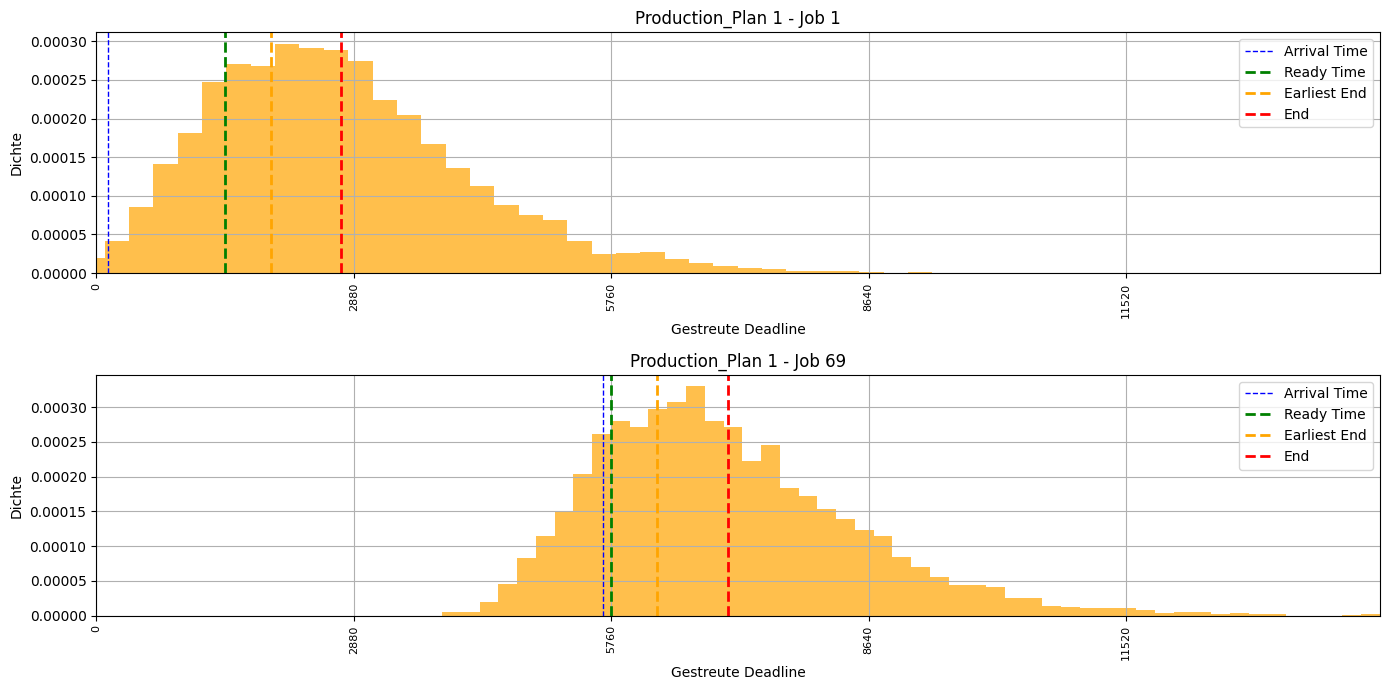

In [23]:
df = add_deadline_list_from_fn(df_jobs_times, base_fn=add_groupwise_lognormal_deadlines,
                                          k=5000, seed=42, sigma=0.3)

filt = df.Production_Plan_ID.astype(str) == "1"
df_plot = df[filt]
plot_random_deadline_distributions(df_plot, n=2)

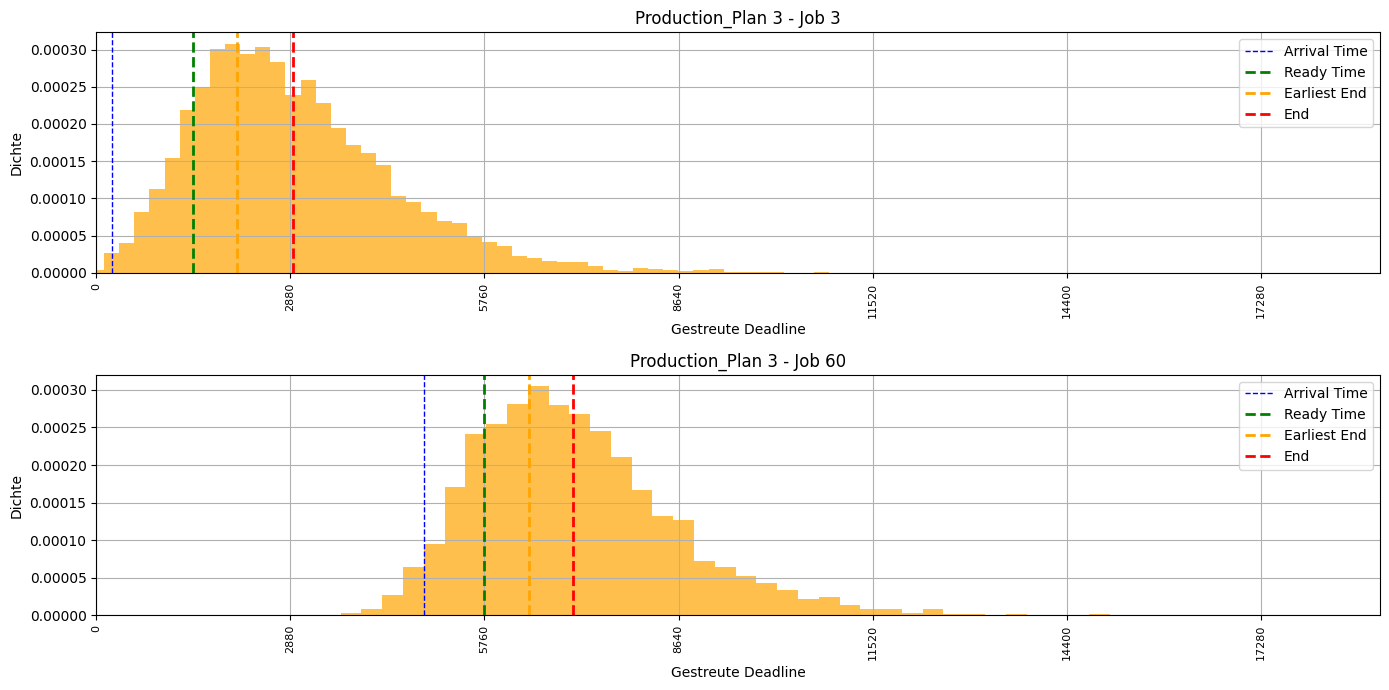

In [24]:
filt = df.Production_Plan_ID.astype(str) == "3"
df_plot = df[filt]
plot_random_deadline_distributions(df_plot, n=2)